<a href="https://colab.research.google.com/github/Edwina-Yeo/LTCC-Math-Bio/blob/main/MM_matched_asymptotics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **Separation of timescales in biology - method of matched asymptotic expansions**

In this notebook we will evalutate the solution of the Michaelis-Menten model for enzyme kinetics derived using matched asymptotics for the case when the amount of enzyme is much less than the amount of reactant or product.

**Resources**
This notebook is uses the solution presented in the following lecture course notes by David Tong:

* https://www.damtp.cam.ac.uk/user/tong/mathbio.html


# Full Model

# 1.   $\frac{dS}{dt}=k_1SE + k_2C $
# 2.   $\frac{dR}{dt}=k_1SE + (k_2 + k_3)C $
#3.   $\frac{dC}{dt}= k_1SE − (k_2 + k_3)C $
#4.   $\frac{dP}{dt}= k_3C $

 with initial conditions $S(0)=S_0$, $E(0)=E_0\ll S_0$, $P(0)=C(0)=0$

**Dimensionless reduced model for $s(t)$ $c(t)$ only**

# 1.   $\frac{ds}{dt}=−s+(s+\mu−\lambda)c $
# 2.   $\frac{dc}{dt}=(s-(s+\mu)c)/\epsilon $


In the code below we plot the late time solution, the initial solution, the composite solution and compare to the full numerical solution.

**Activities**

In general, think about the comparitive benefits and drawbacks of solving the model numerically compared to the analytical solution? You do not have to complete these activities in order; you could also do some wider reading and explore other ideas, building from this code or writing new code.



*  Inspect and run the code below, and inspect the output.
*  Try to understand how to change parameters and how they affect the solutions.
* When does the asymptotic solution do well? When does it do badly?
* What is the use or value of the composite solution compared to the numerical solution?
* Can you create a plot of the error that the composite solution makes compared to the full solution as you vary $\epsilon$?



<ipython-input-3-13002446e767>:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  s_late[i] = fsolve(s_late_fun, s_late[i-1], args=(t[i]))


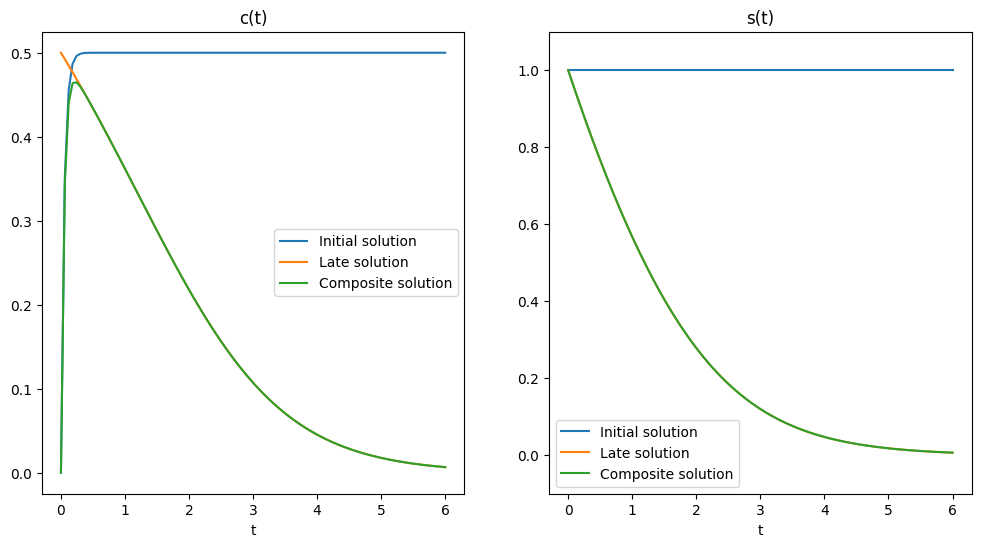

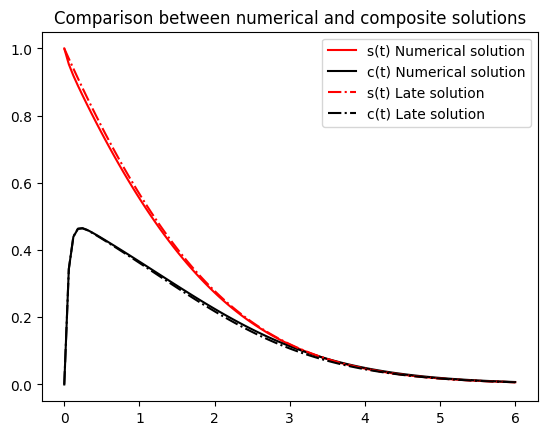

In [ ]:
import numpy as np
from scipy.integrate import odeint
from scipy.optimize import fsolve
import matplotlib.pyplot as plt

# Parameters
lam = 1  # production rate of product - dimensionless
mu = 1   # reverse reaction rate - dimensionless
eps = 0.1  # Small parameter: ratio of enzyme amount to substrate amount

# ODE function for numerical solution
def MM_ode(y, t, mu, lam, eps):
    s, c = y
    dsdt = -s + (s + mu - lam) * c
    dcdt = (s - (s + mu) * c) / eps
    return [dsdt, dcdt]

# Time points where solution is computed
t = np.linspace(0, 6, 100)

# Initial conditions
y0 = [1, 0]

# Solve ODE numerically
r = odeint(MM_ode, y0, t, args=(mu, lam, eps))

# Define the late solution function for s
def s_late_fun(s, t):
    return s + mu * np.log(s) + lam * t - 1

# Compute the late solution for s
s_late = np.zeros_like(t)
s_late[0]=1
for i in range(1,len(t)):
    s_late[i] = fsolve(s_late_fun, s_late[i-1], args=(t[i]))

# Define the late solution function for c
def c_late(s):
    return s / (s + mu)

# Initial solution for s and c
s_initial = np.ones_like(t)
def c_initial(t):
    return 1 / (1 + mu) * (1 - np.exp(-(1 + mu) * t / eps))

# Composite solutions for s and c
c_composite = c_initial(t) + c_late(s_late) - 1 / (1 + mu)
s_composite = s_initial + s_late - 1

# Plot the solutions
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(t, c_initial(t), label='Initial solution')
plt.plot(t, c_late(s_late), label='Late solution')
plt.plot(t, c_composite, label='Composite solution')
plt.xlabel('t')
plt.title('c(t)')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(t, s_initial, label='Initial solution')
plt.plot(t, s_late, label='Late solution')
plt.plot(t, s_composite, label='Composite solution')
plt.ylim([-0.1, 1.1])
plt.xlabel('t')
plt.legend()
plt.title('s(t)')

plt.figure()
plt.plot(t, r[:, 0], 'r', label='s(t) Numerical solution')
plt.plot(t, r[:, 1], 'k', label='c(t) Numerical solution')
plt.plot(t, s_composite, 'r-.', label='s(t) Late solution')
plt.plot(t, c_composite, 'k-.', label='c(t) Late solution')
plt.title('Comparison between numerical and composite solutions')
plt.legend()

plt.show()